<p align="center"><img src="src\logo.png" height=100></p>

<div style="text-align: center; font-weight: bold; font-size: 50px;">

EDA: OUTLIERS, DUPLICADOS, VALORES FALTANTES, NULOS Y GRAFICOS

</div>

Importamos las librerias necesarias para nuestro procesamiento datos

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

Ignoramos los warnings 

In [11]:
warnings.filterwarnings('ignore')

Leemos los dataframes 

In [12]:
df=pd.read_excel("datasetsxls\Internet_Penetracion.xlsx",sheet_name="Penetracion-hogares")
df1 = pd.read_excel("datasetsxls\Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.xlsx", sheet_name="Accesos por velocidad")
df2 = pd.read_excel("datasetsxls/Accesos a Internet fijo por velocidad bajada y provincia.xlsx")
df3 = pd.read_excel("datasetsxls\Acceso a Internet fijo por tecnología y provincia.xlsx", sheet_name="Accesos Por Tecnología")
df4 = pd.read_excel("datasetsxls\Accesos a banda ancha y banda angosta por provincia.xlsx", sheet_name="Dial-BAf")
df5= pd.read_excel("datasetsxls\Velocidad media de bajada de Internet fijo por provincia.xlsx", sheet_name="Velocidad % por prov")
df6 = pd.read_excel("datasetsxls/Accesos a Internet fijo por velocidad de bajada y localidad.xlsx", sheet_name="internet_Accesos_por_loc")
df7= pd.read_excel("datasetsxls\Accesos a Internet fijo por tecnología y localidad.xlsx")
df8 = pd.read_excel("datasetsxls\Accesos a banda ancha y banda angosta por provincia.xlsx", sheet_name="Totales")
df9 = pd.read_excel("datasetsxls\Listado de localidades con conectividad a internet.xlsx")
df10 = pd.read_excel("datasetsxls\Acceso a Internet fijo por tecnología y provincia.xlsx", sheet_name="Totales")
df11= pd.read_excel("datasetsxls\Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.xlsx", sheet_name="Totales")
df12 = pd.read_excel("datasetsxls\Ingresos trimestrales por la prestación del servicio de Internet fijo.xlsx")
df13=pd.read_excel("datasetsxls\Internet_Penetracion.xlsx",sheet_name="Penetracion-totales")
df14=pd.read_excel("datasetsxls\Velocidad media de bajada de Internet fijo por provincia.xlsx", sheet_name="Totales")

# <span style=" font-weight:bold"> Procesamiento del Datasets Internet Penetración hogares</span>

In [13]:
df.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


Se observa la información de las columnas, la cantidad de no nullos y su tipo de dato

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Comprobamos que no hay nulos en las columnas

In [15]:
df.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

Se observa un análisis estadístico de las columnas numéricas

In [16]:
df.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620138
std,2.583484,1.118682,23.319298
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.216632
50%,2018.000000,2.500000,46.386588
75%,2020.000000,3.250000,62.442698
max,2022.000000,4.000000,124.061394


Comprobamos si hay duplicados

In [17]:
duplicados = df.duplicated()  
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Observamos si hay Outliers

In [18]:
def outliers(df):
    for columna in df:
        if df[columna].dtype != np.object_:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers(df)

Año | 0 | int64
Trimestre | 0 | int64
Accesos por cada 100 hogares | 9 | float64


Gráficas de boxplot para observar los Outliers

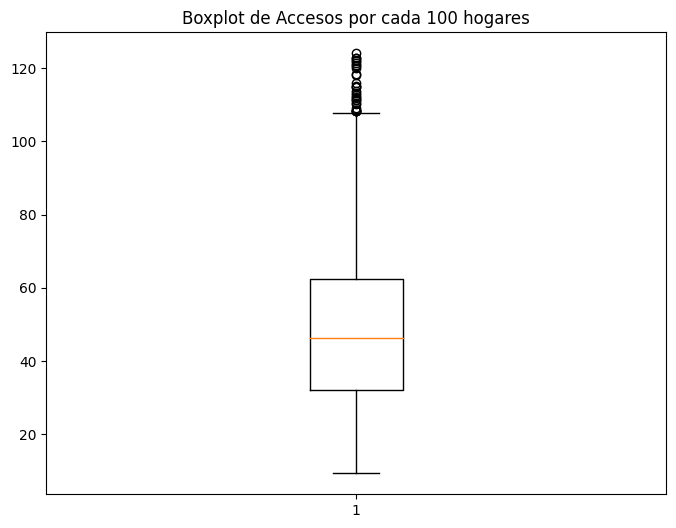

In [19]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Accesos por cada 100 hogares'])
plt.title('Boxplot de Accesos por cada 100 hogares')
plt.show()

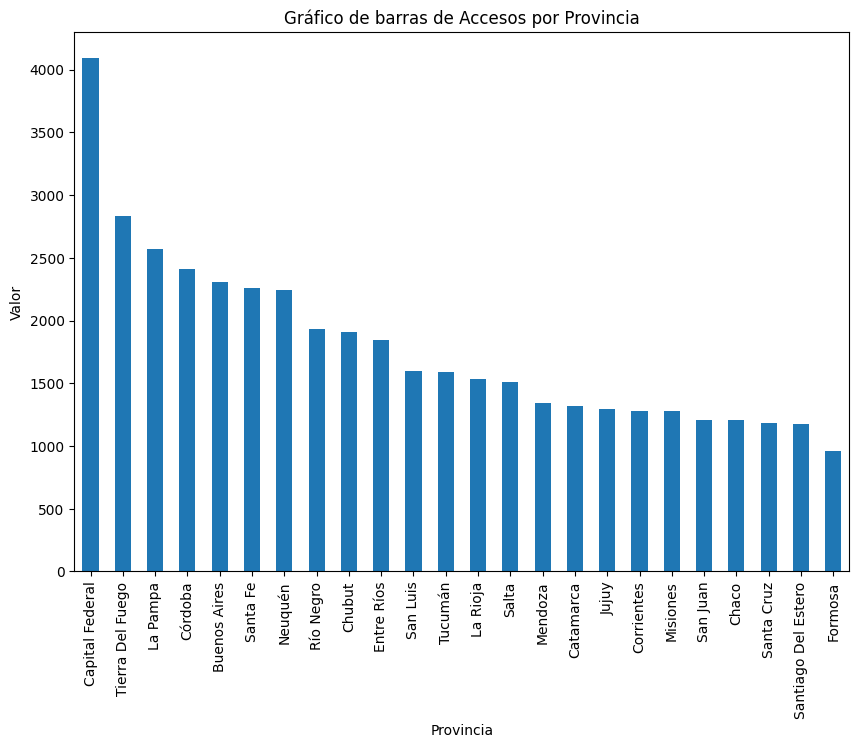

In [20]:
df.groupby('Provincia').sum()["Accesos por cada 100 hogares"].sort_values(ascending=False).plot(kind='bar', figsize=(10, 7))
plt.title('Gráfico de barras de Accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Valor')
plt.show()

Se observa que la provincia de Capital Federal tiene el mayor acceso a Internet por cada 100 hogares, mientras que la provincia de Formosa presenta el menor acceso. Esta observación revela una marcada disparidad en el acceso a los servicios de Internet entre diferentes regiones del país. Esta discrepancia puede estar influenciada por una serie de factores, entre los que se incluyen la infraestructura de telecomunicaciones, la densidad de población, el nivel de desarrollo económico y la inversión en tecnología.

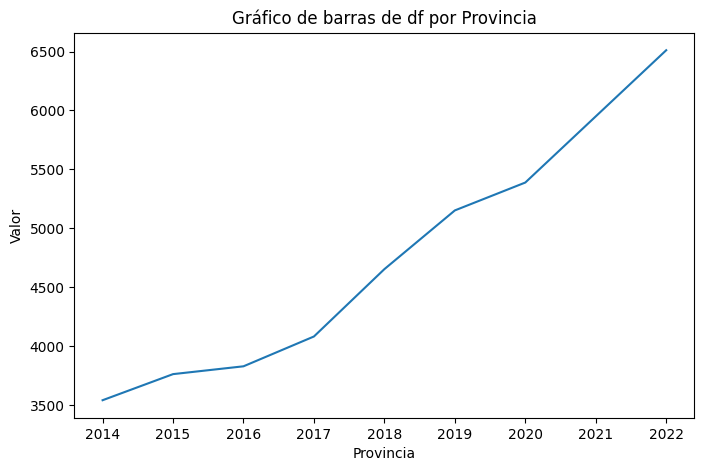

In [21]:
df.groupby('Año').sum()["Accesos por cada 100 hogares"].plot(kind='line', figsize=(8, 5))
plt.title('Gráfico de barras de df por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Valor')
plt.show()

A lo largo de los años, se ha observado un marcado y constante crecimiento en el acceso a Internet en las diversas provincias de Argentina. Este fenómeno no solo refleja la creciente importancia de la conectividad digital en la vida cotidiana de las personas, sino que también es un indicador clave del desarrollo tecnológico y económico en el país.

# <span style="font-weight:bold">Procesamiendo del Datasets Acceso a Internet Fijo por rangos de velocidad de bajada y provincia</span>

In [23]:
df1.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


Mostramos la informacón de las columnas, la cantidad de no nulos y el tipo de dato

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


Revisamos si el datasets tiene nulos

In [25]:
df1.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

Observamos los nulos de la columna "OTROS"

In [26]:
null_data1 = df1[df1.isnull().any(axis=1)]
null_data1

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
337,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
347,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
348,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
355,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
358,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
359,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


Convertir los nulos de la columna "OTROS" a 0

In [27]:
df1['OTROS'] = df1['OTROS'].fillna(0)

In [28]:
df1.isnull().sum()#revision de nulos, observamos que ya no hay 

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

Comprobamos si hay duplicados

In [29]:
duplicados = df1.duplicated()  
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Hacemos análisis descriptivo de las columnas

In [30]:
df1.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,864.000000,8.640000e+02
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5252.479167,3.474059e+05
std,2.583484,1.118682,13459.419708,21992.818620,3.438435e+05,65383.130836,93024.185664,73859.534388,3.635417e+05,12973.667653,7.450600e+05
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.000000,5.274050e+04
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.000000,1.052355e+05
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5068.000000,1.791482e+05
max,2022.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.000000,4.794665e+06


Miramos si hay Outlaiers

In [31]:
def outliers(df1):
    for columna in df1:
        if df1[columna].dtype != np.object_:
            n_outliers = len(df1[np.abs(stats.zscore(df1[columna])) > 3])
            print("{} | {} | {}".format(
                df1[columna].name,
                n_outliers,
                df1[columna].dtype
        ))

outliers(df1)

Año | 0 | int64
Trimestre | 0 | int64
HASTA 512 kbps | 4 | float64
+ 512 Kbps - 1 Mbps | 30 | float64
+ 1 Mbps - 6 Mbps | 23 | float64
+ 6 Mbps - 10 Mbps | 29 | float64
+ 10 Mbps - 20 Mbps | 21 | float64
+ 20 Mbps - 30 Mbps | 15 | float64
+ 30 Mbps | 18 | float64
OTROS | 10 | float64
Total | 36 | float64


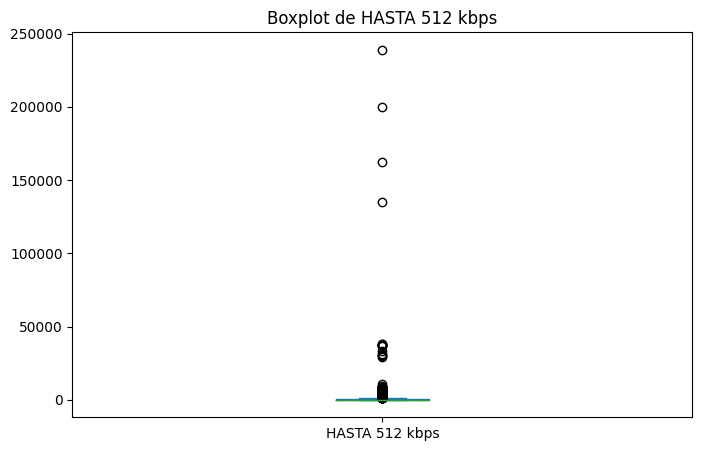

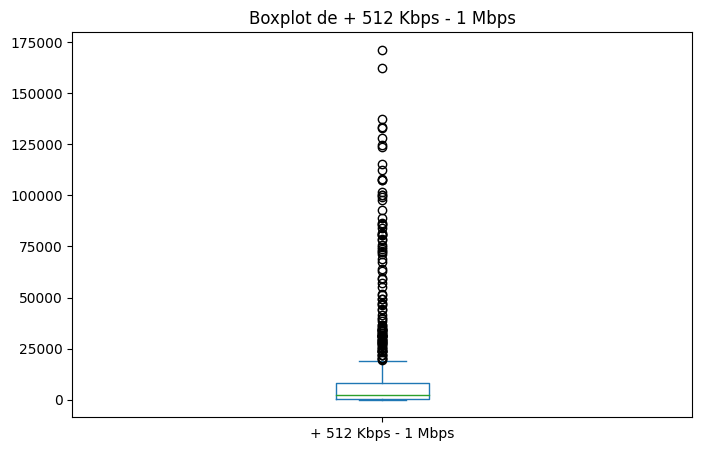

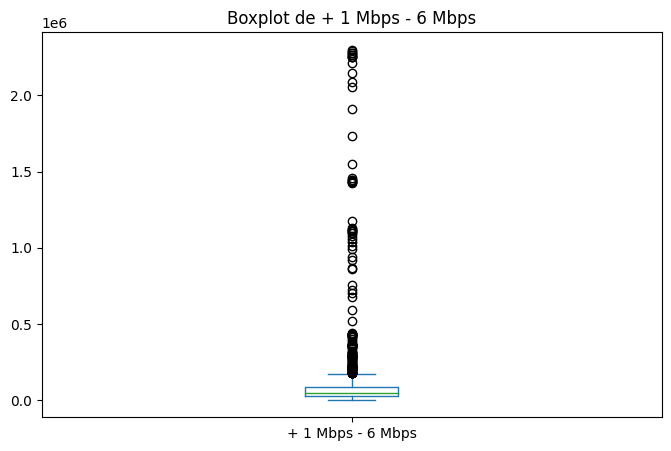

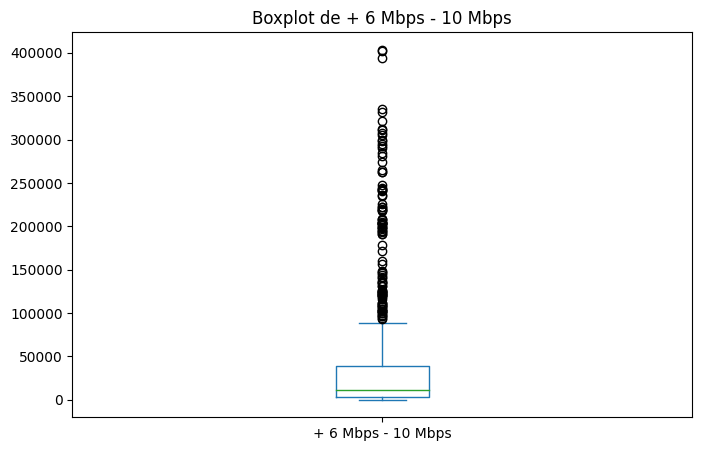

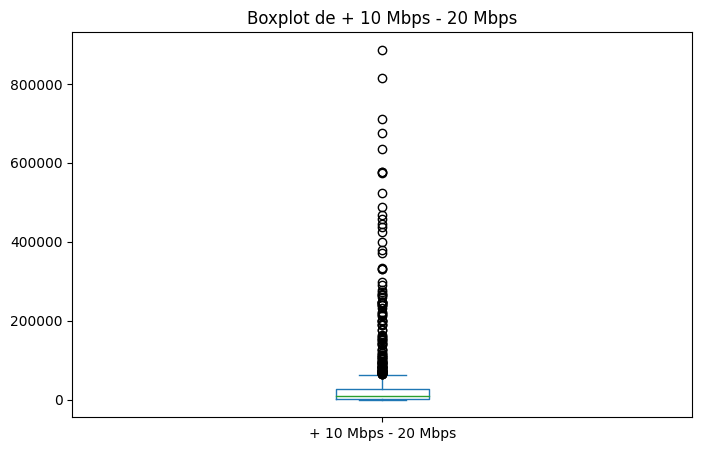

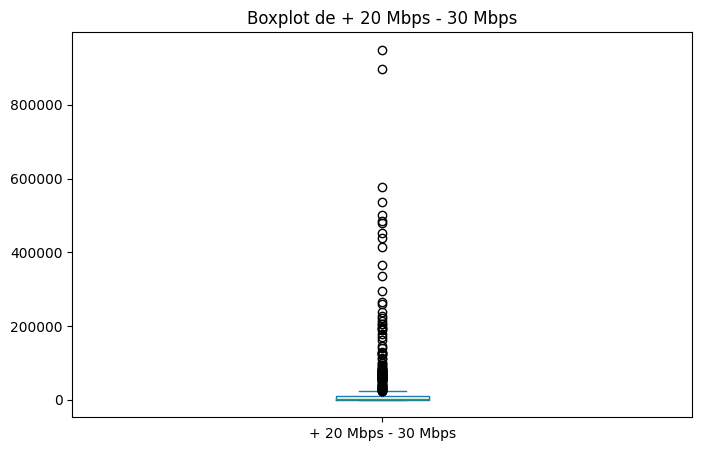

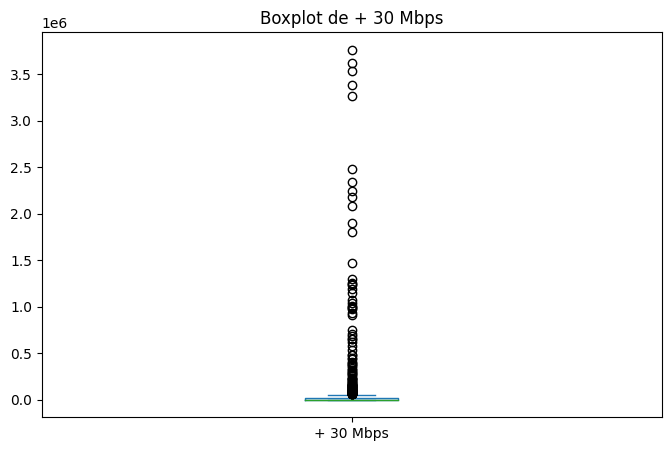

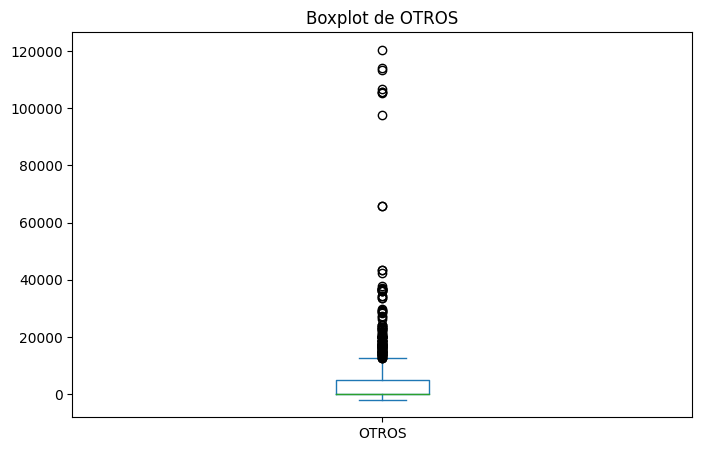

In [32]:
import matplotlib.pyplot as plt

columnas = ['HASTA 512 kbps',"+ 512 Kbps - 1 Mbps","+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps","+ 10 Mbps - 20 Mbps","+ 20 Mbps - 30 Mbps","+ 30 Mbps","OTROS"]

for columna in columnas:
    plt.figure(figsize=(8,5))
    df1[columna].plot(kind='box')
    plt.title(f'Boxplot de {columna}')
    plt.show()

Gráfica de Acceso a Internet Fijo por rangos de velocidad de bajada por provincia

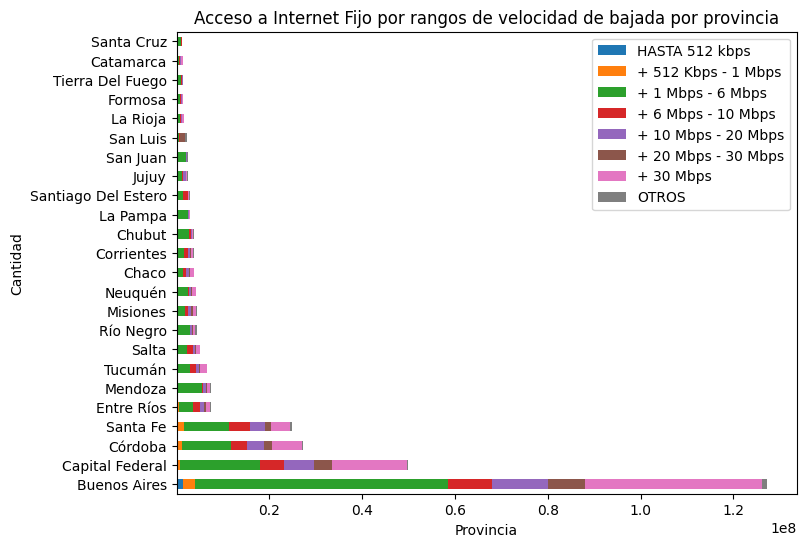

In [33]:
columnas = ["HASTA 512 kbps","+ 512 Kbps - 1 Mbps",'+ 1 Mbps - 6 Mbps',"+ 6 Mbps - 10 Mbps","+ 10 Mbps - 20 Mbps",
            "+ 20 Mbps - 30 Mbps",'+ 30 Mbps', 'OTROS']

df_sum = df1.groupby('Provincia').sum()[columnas]
df_sum['Total'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by='Total', ascending=False)
df_sum[columnas].plot(kind='barh', stacked=True, figsize=(8, 6))

plt.title('Acceso a Internet Fijo por rangos de velocidad de bajada por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

Es evidente que la provincia de Buenos Aires se destaca por ofrecer un rango de acceso a Internet con velocidades de bajada particularmente notables. Esta observación pone de manifiesto una tendencia en la que los usuarios en esta provincia tienen la ventaja de disfrutar de conexiones más rápidas y de mayor calidad en comparación con otras regiones.

Uno de los aspectos más destacados del acceso a Internet en Buenos Aires es la disponibilidad de velocidades de bajada que oscilan entre 6 y 10 Mbps, así como velocidades que superan los 30 Mbps. Estas velocidades ofrecen a los usuarios la capacidad de acceder a contenido en línea de alta calidad, transmitir videos en tiempo real, realizar videoconferencias y descargar archivos de manera eficiente. En última instancia, estas velocidades más rápidas pueden mejorar significativamente la experiencia en línea y permitir una mayor productividad en el trabajo y el estudio.

# <span style=" font-weight:bold">Procesamiento del Datasets Accesos a Internet fijo por velocidad bajada y provincia</span>

In [74]:
df2.head()   

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mostramos la informacón de las columnas, la cantidad de no nulos y el tipo de dato

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Columns: 186 entries, Año to 10000 Mbps
dtypes: float64(184), int64(1), object(1)
memory usage: 734.0+ KB


Observamos los nulos de las columnas

In [6]:
df2.isnull().sum()

Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
5125 Mbps     1
6000 Mbps     1
7000 Mbps     1
8000 Mbps     1
10000 Mbps    1
Length: 186, dtype: int64

Observamos los nulos de la fila

In [7]:
null_data2 = df2[df2.isnull().any(axis=1)]
null_data2

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos los valores nulos

In [10]:
df2 = df2.dropna()

In [11]:
df2.isnull().sum()

Año           0
Trimestre     0
Provincia     0
Otros         0
0,256 Mbps    0
             ..
5125 Mbps     0
6000 Mbps     0
7000 Mbps     0
8000 Mbps     0
10000 Mbps    0
Length: 186, dtype: int64

Observamos los Outlaiers

In [8]:
def outliers(df2):
    for columna in df2:
        if df2[columna].dtype != np.object_:
            n_outliers = len(df2[np.abs(stats.zscore(df2[columna])) > 3])
            print("{} | {} | {}".format(
                df2[columna].name,
                n_outliers,
                df2[columna].dtype
        ))

outliers(df2)

Año | 0 | float64
Trimestre | 0 | float64
Otros | 0 | float64
0,256 Mbps | 0 | float64
0,375 Mbps | 0 | float64
0,625 Mbps | 0 | float64
0,5 Mbps | 0 | float64
0,512 Mbps | 0 | float64
0,75 Mbps | 0 | float64
1 Mbps | 0 | float64
1,2 Mbps | 0 | float64
1,25 Mbps | 0 | float64
1,5 Mbps | 0 | float64
2 Mbps | 0 | float64
2,2 Mbps | 0 | float64
2,5 Mbps | 8 | int64
6,7 Mbps | 0 | float64
3 Mbps | 0 | float64
3,2 Mbps | 0 | float64
3,3 Mbps | 0 | float64
3,5 Mbps | 0 | float64
4 Mbps | 0 | float64
4,5 Mbps | 0 | float64
5 Mbps | 0 | float64
6 Mbps | 0 | float64
6,4 Mbps | 0 | float64
7 Mbps | 0 | float64
7,5 Mbps | 0 | float64
8 Mbps | 0 | float64
9 Mbps | 0 | float64
10 Mbps | 0 | float64
10,2 Mbps | 0 | float64
10,6 Mbps | 0 | float64
11 Mbps | 0 | float64
12 Mbps | 0 | float64
12,3 Mbps | 0 | float64
13 Mbps | 0 | float64
14 Mbps | 0 | float64
15 Mbps | 0 | float64
16 Mbps | 0 | float64
17 Mbps | 0 | float64
18 Mbps | 0 | float64
19 Mbps | 0 | float64
20 Mbps | 0 | float64
20,5 Mbps | 0

Observamos si hay duplicados

In [9]:
duplicados = df2.duplicated()  #DUPLICADOS
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Debido a la gran cantidad de columnas en este conjunto de datos, me resulta casi imposible generar gráficos de manera eficiente. Además, en el conjunto de datos anterior, se observan las velocidades de acceso a Internet categorizadas por rangos.

# <span style=" font-weight:bold">Acceso a Internet fijo por tecnología y provincia</span>

In [35]:
df3.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


Mostramos la informacón de las columnas, la cantidad de no nulos y el tipo de dato

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 61.0+ KB


Observamos los nulos de las columnas

In [37]:
df3.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

Miramos la fila con nulos

In [38]:
null_data3 = df3[df3.isnull().any(axis=1)]
null_data3

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos las filas con valores nulos

In [39]:
df3.drop([864, 865], inplace=True)

In [40]:
df3.isnull().sum() #observamos que ya no hay nulos

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Observamos si hay valores duplicados

In [41]:
duplicados = df3.duplicated()  
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Análisis descriptivo de las columnas numéricas

In [42]:
df3.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,8.640000e+02,8.640000e+02,8.640000e+02,864.000000,864.000000,8.640000e+02
mean,1.255457e+05,1.739913e+05,3.262331e+04,10720.798611,6228.967593,3.491101e+05
std,2.520514e+05,4.276313e+05,1.325430e+05,18723.092796,10740.931282,7.494854e+05
min,6.120000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2.232025e+04,8.912500e+03,2.052500e+02,261.000000,313.000000,5.232900e+04
50%,4.816100e+04,3.498400e+04,1.233000e+03,4377.000000,1862.500000,1.045965e+05
75%,1.025470e+05,7.168325e+04,1.564250e+04,12673.750000,7128.000000,1.801745e+05
max,1.586343e+06,2.767247e+06,1.499149e+06,129910.000000,73415.000000,4.794665e+06


Miramos si hay Outliers

In [43]:
def outlierscol(df3):
    for columna in df3:
        if df3[columna].dtype != np.object_:
            n_outliers = len(df3[np.abs(stats.zscore(df3[columna])) > 3])
            print("{} | {} | {}".format(
                df3[columna].name,
                n_outliers,
                df3[columna].dtype
        ))

outlierscol(df3)

ADSL | 23 | float64
Cablemodem | 24 | float64
Fibra óptica | 13 | float64
Wireless | 23 | float64
Otros | 14 | float64
Total | 36 | float64


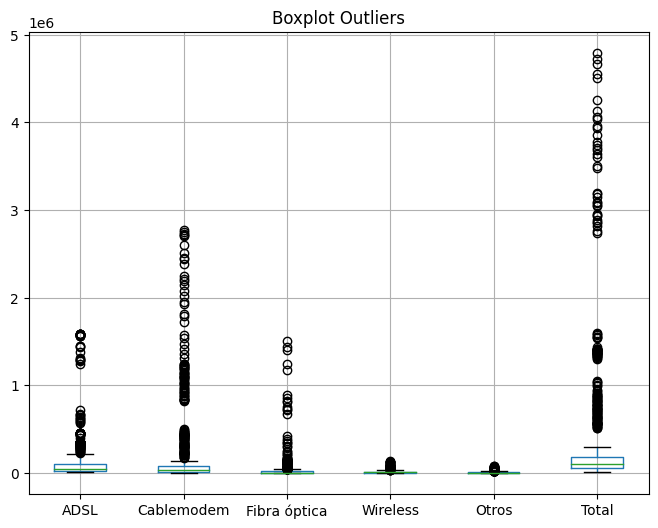

In [44]:
df3.boxplot(figsize=(8, 6))
plt.title('Boxplot Outliers')
plt.show()

Gráfica Accesos de Internet por Tecnología y provincia

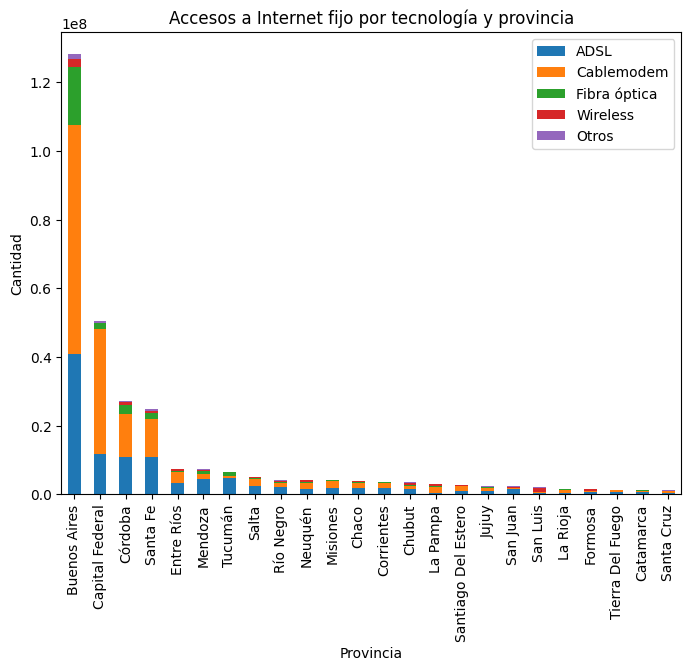

In [45]:
df_sum = df3.groupby('Provincia').sum()[['ADSL', 'Cablemodem', 'Fibra óptica','Wireless','Otros']]
df_sum['Total'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by='Total', ascending=False)
df_sum[['ADSL', 'Cablemodem', 'Fibra óptica','Wireless','Otros']].plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Accesos a Internet fijo por tecnología y provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

Es evidente que la provincia de Buenos Aires se destaca como una de las regiones líderes en acceso a tecnología en Argentina. Entre las opciones de conectividad más ampliamente utilizadas en esta provincia se encuentran el cable módem y el ADSL (Asymmetric Digital Subscriber Line).

Este hecho refleja un alto nivel de adopción de tecnología y una infraestructura de telecomunicaciones sólida en la provincia de Buenos Aires. El acceso a servicios de cable módem y ADSL ofrece a los residentes y empresas la capacidad de disfrutar de conexiones de Internet de alta velocidad y confiabilidad, lo que facilita la navegación en línea, la comunicación efectiva y el acceso a una amplia gama de recursos digitales.

# <span style="font-weight:bold">Accesos a banda ancha y banda angosta por provincia</span>

In [46]:
df4.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


Observamos la información de las columnas 

In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


Miramos si hay nulos

In [48]:
df4.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

Observamos los nulos

In [49]:
null_data4 = df4[df4.isnull().any(axis=1)]
null_data4

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


Convertimos los nulos a 0

In [50]:
df4 = df4.fillna(0)

In [51]:
df4.isnull().sum() #comprobamos que ya no hay nulos

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             0
Total               0
dtype: int64

Análisis descriptivo de las columnas numéricas

In [52]:
df4.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,8.640000e+02,864.000000,8.640000e+02
mean,2018.000000,2.500000,3.481485e+05,961.648148,3.491101e+05
std,2.583484,1.118682,7.476219e+05,2395.039110,7.494854e+05
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.750000,5.221525e+04,7.750000,5.232900e+04
50%,2018.000000,2.500000,1.044120e+05,142.500000,1.045965e+05
75%,2020.000000,3.250000,1.791568e+05,619.000000,1.801745e+05
max,2022.000000,4.000000,4.788466e+06,15229.000000,4.794665e+06


Comprobamos los duplicados

In [53]:
duplicados = df4.duplicated()  #DUPLICADOS
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Observamos si hay Outliers

In [54]:
def outlierscol(df4):
    for columna in df4:
        if df4[columna].dtype != np.object_:
            n_outliers = len(df4[np.abs(stats.zscore(df4[columna])) > 3])
            print("{} | {} | {}".format(
                df4[columna].name,
                n_outliers,
                df4[columna].dtype
        ))

outlierscol(df4)

Año | 0 | int64
Trimestre | 0 | int64
Banda ancha fija | 36 | int64
Dial up | 33 | float64
Total | 36 | int64


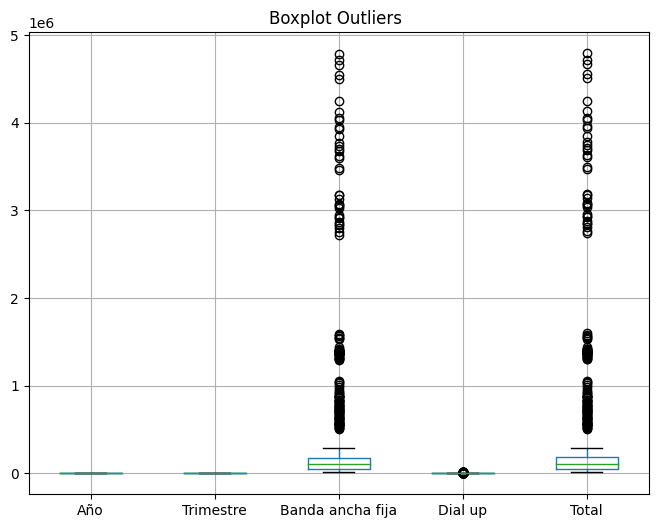

In [55]:
df4.boxplot(figsize=(8, 6))
plt.title('Boxplot Outliers ')
plt.show()

Gráfica Banda Ancha y Banda angosta por provincia

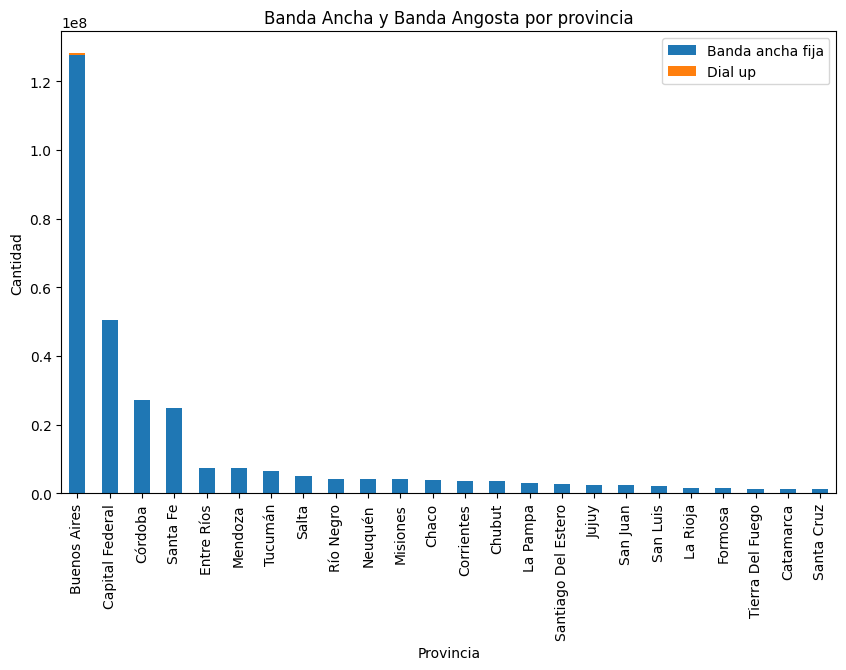

In [56]:
df_sum = df4.groupby('Provincia').sum()[['Banda ancha fija', 'Dial up']]
df_sum['Total'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by='Total', ascending=False)
df_sum[['Banda ancha fija', 'Dial up']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Banda Ancha y Banda Angosta por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

Se observa una fuerte preferencia por el uso de Internet de banda ancha en las provincias de Argentina y un casi nulo uso de Dial-Up en todas las provincias. La preferencia por la banda ancha y la disminución del dial-up en Argentina, junto con la destacada adopción tecnológica en la provincia de Buenos Aires, indican un enfoque en la conectividad de alta calidad y el desarrollo tecnológico. Estos factores son fundamentales para impulsar el crecimiento económico y el progreso en la era digital, pero también resaltan la importancia de garantizar que estas ventajas sean accesibles en todo el país.

# <span style="font-weight:bold">Velocidad media de bajada de Internet fijo por provincia</span>

In [57]:
df5.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


Observamos la información de las columnas

In [58]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Observamos si hay nulos

In [59]:
df5.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Análisis descriptivo de las columnas

In [60]:
df5.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,15.375182
std,2.583484,1.118682,18.320956
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.316775
50%,2018.000000,2.500000,7.416094
75%,2020.000000,3.250000,19.709719
max,2022.000000,4.000000,182.860000


Observamos si hay duplicados

In [61]:
duplicados = df5.duplicated()  
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Observamos Outliers

In [62]:
def outlierscol(df5):
    for columna in df5:
        if df5[columna].dtype != np.object_:
            n_outliers = len(df5[np.abs(stats.zscore(df5[columna])) > 3])
            print("{} | {} | {}".format(
                df5[columna].name,
                n_outliers,
                df5[columna].dtype
        ))

outlierscol(df5)

Año | 0 | int64
Trimestre | 0 | int64
Mbps (Media de bajada) | 20 | float64


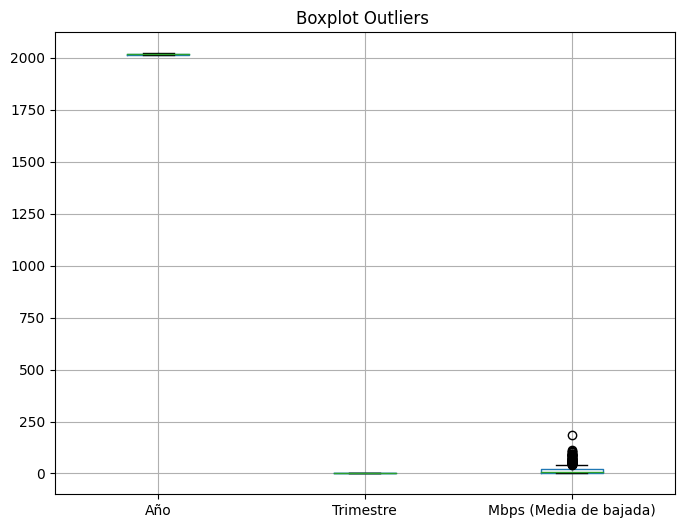

In [63]:
df5.boxplot(figsize=(8, 6))
plt.title('Boxplot Outliers ')
plt.show()

Gráfico Velocidad media de bajada de internet fijo por provincia

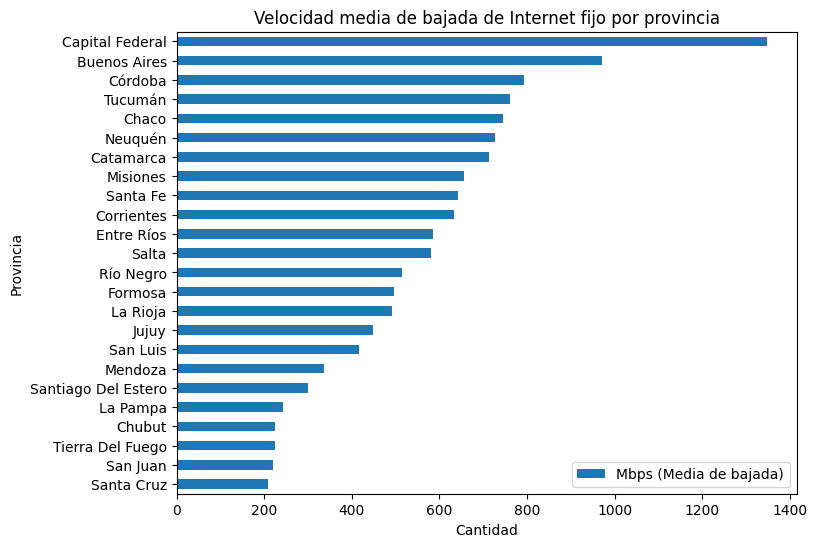

In [64]:
df_sum = df5.groupby('Provincia').sum()[["Mbps (Media de bajada)"]]
df_sum['Total'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by='Total', ascending=True)
df_sum[['Mbps (Media de bajada)']].plot(kind='barh', stacked=True, figsize=(8, 6))
plt.title('Velocidad media de bajada de Internet fijo por provincia')
plt.xlabel('Cantidad')
plt.ylabel('Provincia')
plt.show()

Se puede notar que la Ciudad de Buenos Aires, conocida como Capital Federal, seguida de la provincia de Buenos Aires, sobresalen con un destacado porcentaje en lo que respecta a la velocidad media de descarga de Internet. Esta observación pone de manifiesto el liderazgo en cuanto a la calidad de la conectividad en estas dos áreas geográficas, lo que tiene un impacto significativo en la experiencia en línea de sus residentes y en el desarrollo tecnológico de la región.

Gráfica velocidad media de bajada por año

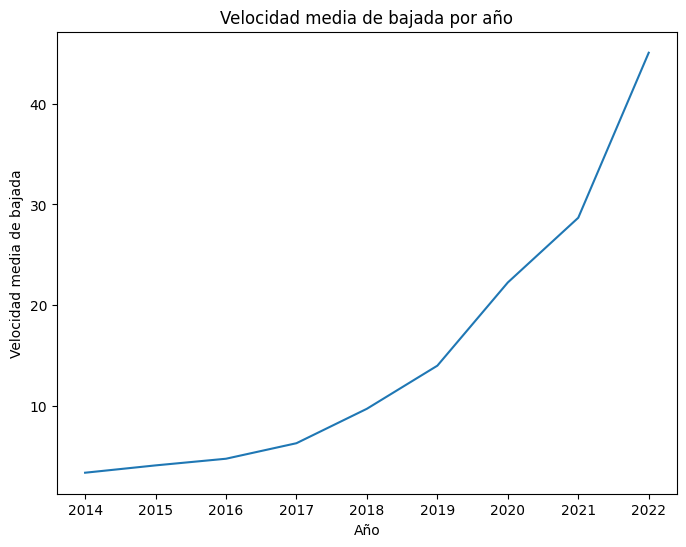

In [65]:
df5.groupby('Año')['Mbps (Media de bajada)'].mean().plot(kind='line', figsize=(8,6))
plt.title('Velocidad media de bajada por año')
plt.xlabel('Año')
plt.ylabel('Velocidad media de bajada')
plt.show()

Sin duda, resulta evidente una relación directamente proporcional entre la velocidad media de descarga de Internet y el incremento de los años. A medida que avanza el tiempo, se observa un constante aumento en la velocidad a la que los usuarios pueden acceder y descargar datos desde la web. Este fenómeno es un reflejo de los avances tecnológicos que han impulsado la infraestructura de telecomunicaciones y la calidad de la conectividad en todo el mundo. El acceso a velocidades de descarga cada vez más rápidas ha transformado la forma en que las personas trabajan, estudian, se entretienen y se comunican en la era digital, lo que subraya la importancia de seguir fomentando el desarrollo tecnológico en esta dirección.

# <span style="font-weight:bold">Accesos a Internet fijo por velocidad de bajada y localidad</span>

In [66]:
df6.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Observamos la información de las columnas

In [67]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Columns: 134 entries, Provincia to Total general
dtypes: float64(130), object(4)
memory usage: 3.2+ MB


Observamos si hay nulos

In [68]:
df6.isnull().sum()  

Provincia           0
Partido             0
Localidad           0
Link Indec          0
Otros            2133
                 ... 
900 Mbps         3094
950 Mbps         3094
1000 Mbps        2751
1024 Mbps        3094
Total general       1
Length: 134, dtype: int64

Análisis estadístico de las columnas numéricas

In [69]:
df6.describe()

,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",1 Mbps,"1,25 Mbps","1,5 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
count,962.000000,28.000000,1.0,643.000000,523.000000,1.0,284.000000,891.000000,1.0,15.000000,...,11.000000,1.0,3.0,4.000000,1.0,1.0,1.0,344.000000,1.0,3.094000e+03
mean,409.856549,3.464286,225.0,47.435459,2.214149,111.0,39.588028,83.405163,25.0,132.533333,...,42.909091,1.0,1.0,159.000000,1.0,110.0,1.0,175.494186,1.0,3.622532e+03
std,3830.231937,6.511995,NaN,1098.962748,5.000386,NaN,118.563946,315.399384,NaN,291.222268,...,89.076882,NaN,0.0,260.008974,NaN,NaN,NaN,914.324632,NaN,3.025105e+04
min,-4.000000,1.000000,225.0,0.000000,1.000000,111.0,1.000000,0.000000,25.0,7.000000,...,1.000000,1.0,1.0,1.000000,1.0,110.0,1.0,1.000000,1.0,-4.000000e+00
25%,1.000000,1.000000,225.0,1.000000,1.000000,111.0,3.000000,3.000000,25.0,31.000000,...,4.000000,1.0,1.0,10.750000,1.0,110.0,1.0,7.000000,1.0,2.500000e+01
50%,5.000000,1.000000,225.0,1.000000,1.000000,111.0,9.500000,13.000000,25.0,47.000000,...,13.000000,1.0,1.0,44.500000,1.0,110.0,1.0,62.000000,1.0,1.600000e+02
75%,50.000000,3.000000,225.0,2.500000,1.000000,111.0,28.000000,53.000000,25.0,75.000000,...,30.500000,1.0,1.0,192.750000,1.0,110.0,1.0,160.000000,1.0,1.055500e+03
max,106261.000000,31.000000,225.0,27866.000000,61.000000,111.0,1307.000000,6307.000000,25.0,1170.000000,...,308.000000,1.0,1.0,546.000000,1.0,110.0,1.0,16708.000000,1.0,1.445665e+06


Comprobamos los duplicados

In [70]:
duplicados = df6.duplicated()  #DUPLICADOS
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Revisamos Outliers

In [71]:
def outlierscol(df6):
    for columna in df6:
        if df6[columna].dtype != np.object_:
            n_outliers = len(df6[np.abs(stats.zscore(df6[columna])) > 3])
            print("{} | {} | {}".format(
                df6[columna].name,
                n_outliers,
                df6[columna].dtype
        ))
outlierscol(df6)

Otros | 0 | float64
0,256 Mbps | 0 | float64
0,375 Mbps | 0 | float64
0,5 Mbps | 0 | float64
0,512 Mbps | 0 | float64
0,625 Mbps | 0 | float64
0,75 Mbps | 0 | float64
1 Mbps | 0 | float64
1,25 Mbps | 0 | float64
1,5 Mbps | 0 | float64
2 Mbps | 0 | float64
2,2 Mbps | 0 | float64
2,5 Mbps | 0 | float64
3 Mbps | 0 | float64
3,3 Mbps | 0 | float64
3,5 Mbps | 0 | float64
4 Mbps | 0 | float64
4,5 Mbps | 0 | float64
5 Mbps | 0 | float64
6 Mbps | 0 | float64
6,4 Mbps | 0 | float64
7 Mbps | 0 | float64
7,5 Mbps | 0 | float64
8 Mbps | 0 | float64
9 Mbps | 0 | float64
10 Mbps | 0 | float64
10,2 Mbps | 0 | float64
11 Mbps | 0 | float64
12 Mbps | 0 | float64
12,3 Mbps | 0 | float64
13 Mbps | 0 | float64
14 Mbps | 0 | float64
15 Mbps | 0 | float64
16 Mbps | 0 | float64
17 Mbps | 0 | float64
18 Mbps | 0 | float64
20 Mbps | 0 | float64
20,5 Mbps | 0 | float64
21 Mbps | 0 | float64
22 Mbps | 0 | float64
23 Mbps | 0 | float64
24 Mbps | 0 | float64
25 Mbps | 0 | float64
25,1 Mbps | 0 | float64
25,5 Mbps 

Debido a la gran cantidad de filas y al hecho de que ya hemos procesado las velocidades por provincias y rangos, se presenta un desafío al intentar representar gráficamente estos datos por localidades, dado el volumen de columnas involucradas. Sin embargo, es importante destacar que este enfoque en el análisis a nivel provincial y por rangos ha proporcionado una visión valiosa de las tendencias generales en la velocidad de acceso a Internet en Argentina. Estos hallazgos son fundamentales para comprender las diferencias en la conectividad y pueden ser la base para futuros análisis detallados a nivel local que permitan una visión más precisa de las necesidades y oportunidades de mejora en diversas localidades del país.

# <span style="font-weight:bold">Accesos a Internet fijo por tecnología y localidad</span>

In [72]:
df7.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


Observamos la información de las columnas

In [73]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   object
 4   ADSL           3137 non-null   int64 
 5   CABLEMODEM     3137 non-null   int64 
 6   DIAL UP        3137 non-null   int64 
 7   FIBRA OPTICA   3137 non-null   int64 
 8   OTROS          3137 non-null   int64 
 9   SATELITAL      3137 non-null   int64 
 10  WIMAX          3137 non-null   int64 
 11  WIRELESS       3137 non-null   int64 
 12  Total general  3137 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 318.7+ KB


Observamos si hay nulos

In [74]:
df7.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

Análisis descriptivo de las columnas numéricas

In [75]:
df7.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3137.000000,3.137000e+03,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3.137000e+03
mean,419.309213,1.924596e+03,3.967485,975.637552,64.918712,1.108065,0.691106,182.648709,3.572877e+03
std,3073.660025,2.363409e+04,44.745777,6599.934747,833.688135,15.515385,14.933928,705.881401,3.165879e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,1.560000e+02
75%,115.000000,7.000000e+00,0.000000,83.000000,0.000000,1.000000,0.000000,120.000000,1.012000e+03
max,138753.000000,1.238196e+06,2145.000000,222066.000000,29586.000000,852.000000,444.000000,20490.000000,1.551926e+06


Comprobamos si hay duplicados

In [76]:
duplicados = df7.duplicated()  #DUPLICADOS
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Observamos Outliers

In [77]:
def outlierscol(df7):
    for columna in df7:
        if df7[columna].dtype != np.object_:
            n_outliers = len(df7[np.abs(stats.zscore(df7[columna])) > 3])
            print("{} | {} | {}".format(
                df7[columna].name,
                n_outliers,
                df7[columna].dtype
        ))

outlierscol(df7)

ADSL | 16 | int64
CABLEMODEM | 10 | int64
DIAL UP | 17 | int64
FIBRA OPTICA | 24 | int64
OTROS | 15 | int64
SATELITAL | 4 | int64
WIMAX | 10 | int64
WIRELESS | 29 | int64
Total general | 11 | int64


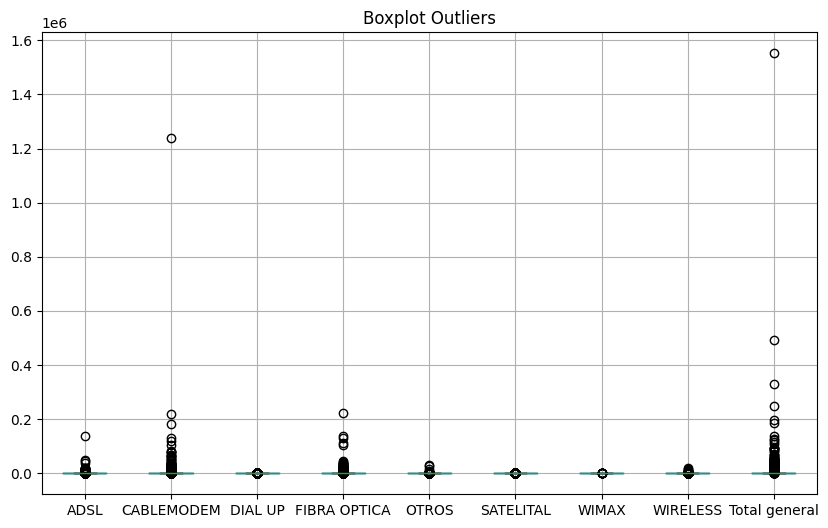

In [78]:
df7.boxplot(figsize=(10, 6))
plt.title('Boxplot Outliers')
plt.show()

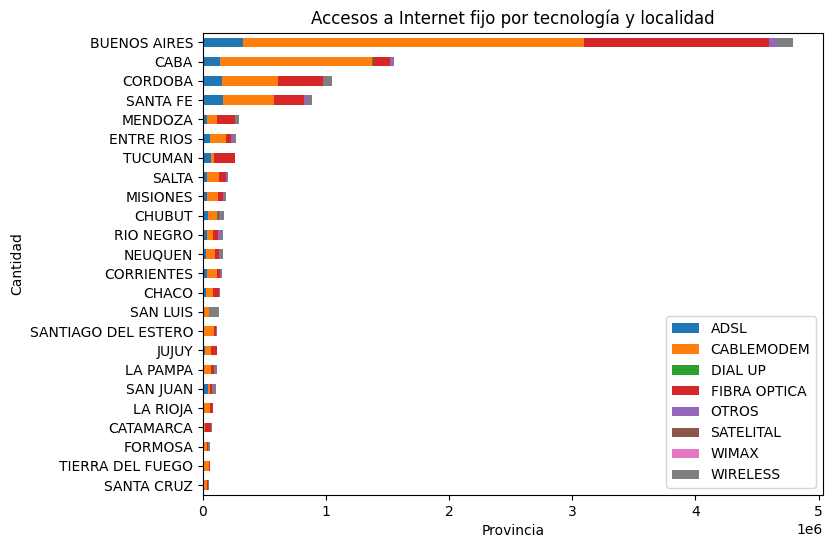

In [79]:
columnas = ['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX', 'WIRELESS']

df_sum = df7.groupby('Provincia').sum()[columnas]
df_sum['Total'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by='Total', ascending=True)
df_sum[columnas].plot(kind='barh', stacked=True, figsize=(8,6))

plt.title('Accesos a Internet fijo por tecnología y localidad')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

La provincia de Buenos Aires continúa destacándose con un notable porcentaje de uso de tecnologías de conectividad. Al analizar estas tendencias a nivel provincial, hemos observado que, debido a la diversidad de localidades y comunidades en Argentina, es más eficiente examinar la adopción tecnológica a este nivel. De manera consistente, el cable módem se mantiene como una de las opciones de conectividad más populares, lo que refleja la preferencia por conexiones de alta velocidad. Sin embargo, lo que resulta particularmente interesante es la creciente adopción de la fibra óptica, que ha superado al ADSL en términos de uso. Este cambio sugiere una demanda creciente de velocidades de Internet más rápidas y una mayor disponibilidad de esta tecnología, lo que a su vez puede impulsar el acceso a servicios de alta calidad y estimular el desarrollo tecnológico en la región.

# <span style="font-weight:bold">Total nacional de accesos a Internet fijo por banda ancha y banda angosta</span>

In [80]:
df8.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022
1,2022,3,11078691,12437,11091128,Jul-Sept 2022
2,2022,2,10946248,12436,10958684,Abr-Jun 2022
3,2022,1,10611390,12619,10624009,Ene-Mar 2022
4,2021,4,10476933,12861,10489794,Oct-Dic 2021


Observamos la información de las columnas

In [81]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


Notamos si hay nulos

In [82]:
df8.isnull().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

Análisis descriptivo de las columnas numéricas

In [83]:
df8.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,36.000000,36.000000,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,8.355563e+06,23079.555556,8.378642e+06
std,2.618615,1.133893,1.471390e+06,10107.978375,1.462265e+06
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06
25%,2016.000000,1.750000,7.061275e+06,12436.750000,7.093767e+06
50%,2018.000000,2.500000,8.201878e+06,26861.500000,8.228740e+06
75%,2020.000000,3.250000,9.400024e+06,32491.750000,9.410040e+06
max,2022.000000,4.000000,1.119567e+07,39324.000000,1.120811e+07


Comprobamos Outliers

In [120]:
def outlierscol(df8):
    for columna in df8:
        if df8[columna].dtype != np.object_:
            n_outliers = len(df8[np.abs(stats.zscore(df8[columna])) > 3])
            print("{} | {} | {}".format(
                df8[columna].name,
                n_outliers,
                df8[columna].dtype
        ))

outlierscol(df8)

Año | 0 | int64
Trimestre | 0 | int64
Banda ancha fija | 0 | int64
Dial up | 0 | int64
Total | 0 | int64


Observamos si hay duplicados

In [84]:
duplicados = df8.duplicated()  
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


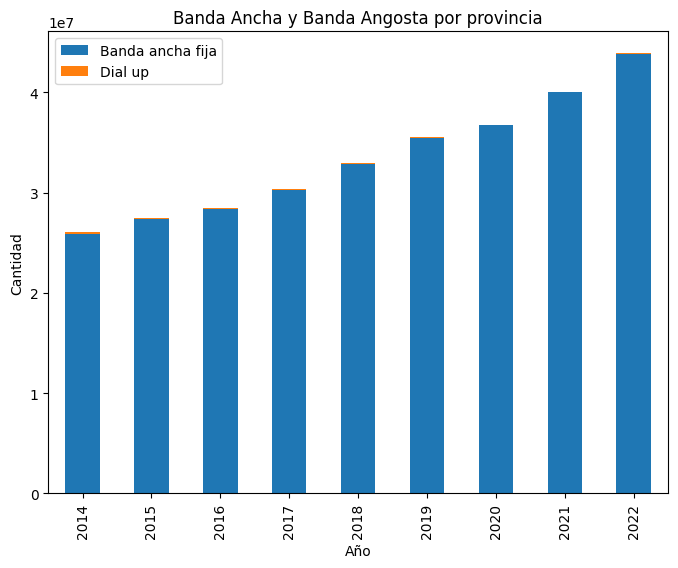

In [85]:
df8.groupby('Año').sum()[['Banda ancha fija', 'Dial up']].plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Banda Ancha y Banda Angosta por provincia')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

Una vez más, se pone de manifiesto la preferencia por las conexiones de banda ancha en lugar de las conexiones dial-up en todo el país. Esta elección refleja la necesidad de velocidades de Internet más rápidas y eficientes para satisfacer las demandas actuales de navegación en línea, comunicación y trabajo remoto. Además, es interesante notar un aumento constante en la adopción de conexiones de alta velocidad a medida que transcurren los años. Este incremento en la adopción de tecnologías de banda ancha es un indicador del constante desarrollo tecnológico en Argentina y el creciente papel que desempeña la conectividad de alta velocidad en la vida cotidiana de las personas y en el progreso económico del país.

# <span style="color:cyan; font-weight:bold">Listado de localidades con conectividad a internet</span>

In [86]:
df9.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.0,-35.520141,-60.998949


Observamos la información de las columnas

In [87]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


Reemplazamos los "--" por NO

In [88]:
df9.replace('--', "NO", inplace=True)

In [89]:
df9.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,NO,NO,NO,NO,NO,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,NO,NO,NO,NO,NO,NO,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,NO,NO,SI,NO,NO,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,NO,NO,NO,NO,NO,NO,NO,NO,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,NO,NO,SI,NO,NO,SI,SI,SI,6588060.0,-35.520141,-60.998949


Observamos si hay nulos

In [90]:
df9.isnull().sum()  

Provincia          0
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
dtype: int64

Miramos los nulos en la columna link

In [91]:
null_data9 = df9[df9.isnull().any(axis=1)]
null_data9

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3112,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-77.874009,-34.626560
3113,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-64.895348,-62.870538
3114,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-62.238369,-58.667544
3115,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,NO,NO,NO,NO,NO,NO,NO,NO,SI,NaN,-63.397393,-56.997322
3116,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,NO,NO,NO,NO,NO,NO,NO,SI,SI,NaN,-64.240614,-56.625096
3117,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-64.975862,-60.070679
3118,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-60.737817,-44.737660
3119,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-68.130070,-67.101330
3120,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-62.594350,-59.919054
3121,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,-62.975332,-60.698223


Reemplazamos los nulos po 0

In [92]:
df9.fillna(0, inplace=True)

In [93]:
df9.isnull().sum() #comprobamos que ya no hay nulos

Provincia         0
Partido           0
Localidad         0
Población         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
Satelital         0
Wireless          0
Telefonía Fija    0
3G                0
4G                0
Link              0
Latitud           0
Longitud          0
dtype: int64

Análisis descriptivo de las columnas numéricas

In [94]:
df9.describe()

,Población,Link,Latitud,Longitud
count,4.311000e+03,4.311000e+03,4311.000000,4311.000000
mean,8.695088e+03,3.898457e+07,-32.261794,-63.039123
std,3.821965e+04,2.942562e+07,4.999418,3.830260
min,0.000000e+00,0.000000e+00,-77.874009,-72.891627
25%,1.160000e+02,1.008408e+07,-34.707626,-65.687041
50%,5.760000e+02,3.400701e+07,-32.283511,-63.450636
75%,3.203000e+03,6.612252e+07,-28.584663,-60.008572
max,1.317298e+06,9.401402e+07,-21.817293,-34.626560


Miramos Outliers

In [95]:
def outlierscol(df9):
    for columna in df9:
        if df9[columna].dtype != np.object_:
            n_outliers = len(df9[np.abs(stats.zscore(df9[columna])) > 3])
            print("{} | {} | {}".format(
                df9[columna].name,
                n_outliers,
                df9[columna].dtype
        ))
outlierscol(df9)

Población | 52 | int64
Link | 0 | float64
Latitud | 34 | float64
Longitud | 2 | float64


Comprobamos duplicados

In [96]:
duplicados = df9.duplicated()  #DUPLICADOS
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Gráfico Distribución de provincias

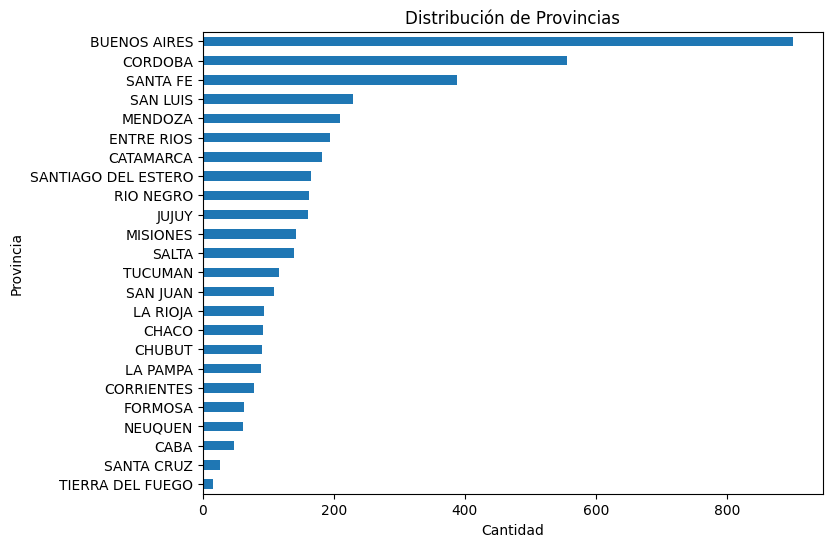

In [97]:
df9['Provincia'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(8, 6))
plt.title('Distribución de Provincias')
plt.xlabel('Cantidad')
plt.ylabel('Provincia')
plt.show()

Sigue siendo notoria la provincia de Buenos Aires en cuanto a conectividad en comparación con las demás provincias. Claramente ocupa el primer lugar en términos de conectividad cuando se analiza a nivel provincial. Esta posición privilegiada se manifiesta en la disposición de recursos tecnológicos, infraestructura de telecomunicaciones avanzada y una mayor adopción de tecnologías de conectividad. Buenos Aires se destaca como epicentro económico y tecnológico, lo que influye en la alta conectividad de sus residentes y empresas. Por otro lado, provincias como Santa Cruz y Tierra del Fuego enfrentan desafíos en términos de conectividad, debido a su geografía y baja densidad de población. La brecha digital persistente en estas regiones subraya la necesidad de inversiones en infraestructura y políticas destinadas a cerrar la brecha y brindar igualdad de oportunidades en términos de acceso a la tecnología y a los beneficios de la sociedad digital.

# <span style="font-weight:bold">Serie trimestral de accesos a Internet fijo por tecnología</span>

In [98]:
df10.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


Observamos la información de las columnas

In [99]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


Observamos si hay nulos 

In [100]:
df10.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

Análisis estadístico de las columnas numéricas

In [101]:
df10.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,36.000000,3.600000e+01
mean,2018.000000,2.500000,2.992507e+06,4.175792e+06,8.035492e+05,257299.166667,149495.222222,8.378642e+06
std,2.618615,1.133893,8.721436e+05,1.249104e+06,8.660955e+05,180164.589451,85534.499745,1.462265e+06
min,2014.000000,1.000000,1.315373e+06,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.750000,2.251404e+06,3.001010e+06,1.680880e+05,85113.250000,64404.250000,7.093767e+06
50%,2018.000000,2.500000,3.539332e+06,4.138156e+06,2.368255e+05,220224.000000,116147.000000,8.228740e+06
75%,2020.000000,3.250000,3.722975e+06,5.287469e+06,1.205959e+06,415332.750000,247467.250000,9.410040e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,3.060575e+06,572969.000000,265328.000000,1.120811e+07


Comprobamos si hay duplicados

In [102]:
duplicados = df10.duplicated()  #DUPLICADOS
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


observamos si hay Outliers

In [103]:
def outlierscol(df10):
    for columna in df10:
        if df10[columna].dtype != np.object_:
            n_outliers = len(df10[np.abs(stats.zscore(df10[columna])) > 3])
            print("{} | {} | {}".format(
                df10[columna].name,
                n_outliers,
                df10[columna].dtype
        ))

outlierscol(df10)

Año | 0 | int64
Trimestre | 0 | int64
ADSL | 0 | int64
Cablemodem | 0 | int64
Fibra óptica | 0 | int64
Wireless | 0 | int64
Otros | 0 | int64
Total | 0 | int64


Gráfico Accesos a Internet Fijo por Tecnología

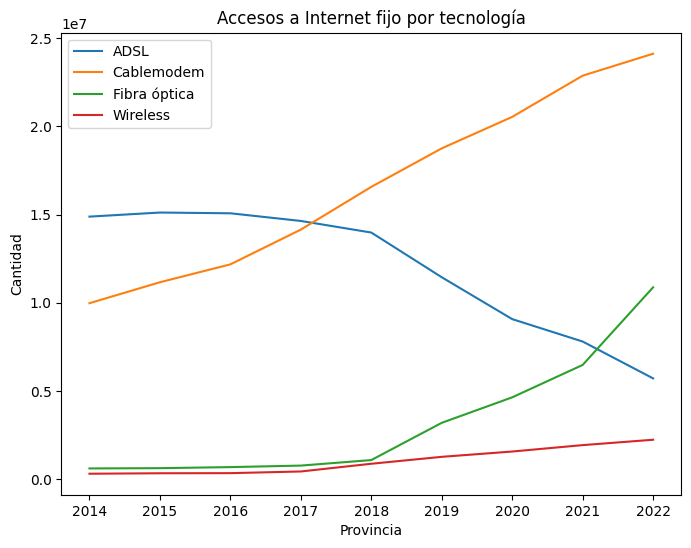

In [104]:
df10.groupby('Año').sum()[['ADSL', 'Cablemodem', 'Fibra óptica','Wireless']].plot(kind='line', figsize=(8,6))
plt.title('Accesos a Internet fijo por tecnología')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

Observamos que la tecnología que más crece es la fibra óptica, seguida de cerca por el cable módem. Estas tecnologías están ganando popularidad debido a su capacidad para proporcionar velocidades de Internet más rápidas y más estables. Por otro lado, la tecnología ADSL está en declive. Aunque fue una de las primeras tecnologías de banda ancha disponibles, está siendo superada por opciones más rápidas y eficientes. En cuanto a las conexiones inalámbricas, se mantienen estables. Aunque no están creciendo tan rápidamente como la fibra óptica o el cable módem, siguen siendo una opción popular para aquellos que necesitan flexibilidad y movilidad.

# <span style="font-weight:bold">Distribución de los accesos totales nacionales a Internet fijo por velocidad</span>

In [105]:
df11.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


Observamos la información de las columnas

In [106]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      36 non-null     int64
 1   Trimestre                36 non-null     int64
 2   Hasta 512 kbps           36 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   36 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  36 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  36 non-null     int64
 8   Más de 30 Mbps           36 non-null     int64
 9   OTROS                    36 non-null     int64
 10  Total                    36 non-null     int64
dtypes: int64(11)
memory usage: 3.2 KB


Notamos si hay nulos

In [107]:
df11.isnull().sum()   

Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64

Análisis descriptivo de las columnas numéricas

In [108]:
df11.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,49571.638889,239046.083333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,126059.500000,8.337742e+06
std,2.618615,1.133893,52406.958667,198205.544715,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,120429.285661,1.504414e+06
min,2014.000000,1.000000,5675.000000,28521.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,28412.500000,74491.750000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,38879.500000,216701.500000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06
75%,2020.000000,3.250000,41184.000000,389368.250000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.410040e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07


Comprobamos los duplicados

In [109]:
duplicados = df11.duplicated()  #DUPLICADOS
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Gráfico de Distribución de los accesos totales nacionales a Internet fijo por velocidad por año

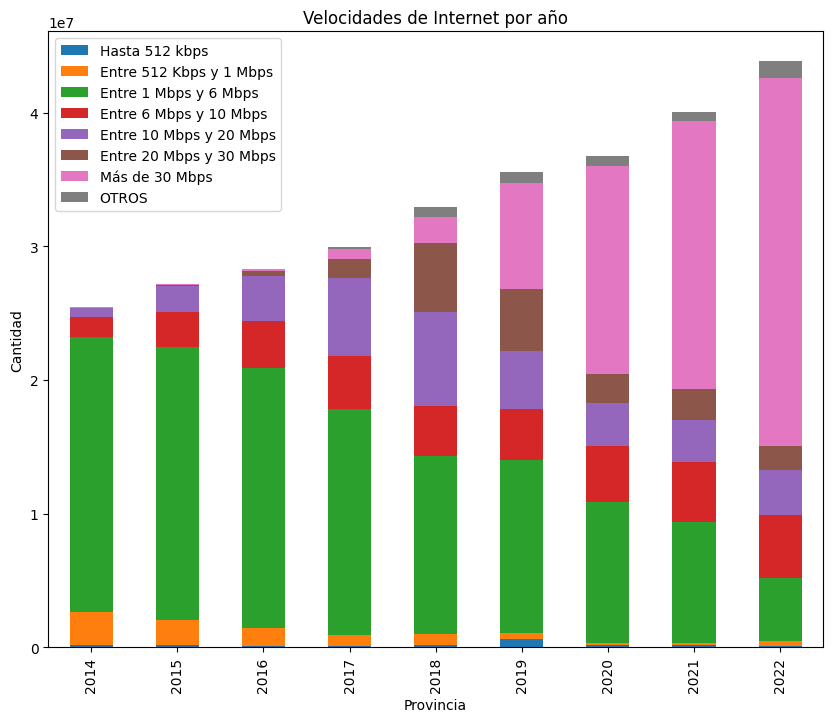

In [110]:
df11.groupby('Año').sum()[["Hasta 512 kbps","Entre 512 Kbps y 1 Mbps",'Entre 1 Mbps y 6 Mbps',"Entre 6 Mbps y 10 Mbps",
                           "Entre 10 Mbps y 20 Mbps","Entre 20 Mbps y 30 Mbps",'Más de 30 Mbps', 'OTROS']].plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Velocidades de Internet por año')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

Al analizar el gráfico a nivel nacional, es evidente que las velocidades de Internet de más de 30 Mbps siguen siendo las más predominantes. Esto puede ser un indicativo de la creciente demanda de conexiones de Internet más rápidas y eficientes, impulsada por factores como el aumento del streaming de video, el trabajo remoto y el aprendizaje en línea. Además, se ha observado un incremento constante en el uso de estas velocidades de Internet a lo largo de los años. Este crecimiento puede ser atribuido a la mejora continua de la infraestructura de Internet y a la mayor disponibilidad de servicios de banda ancha de alta velocidad. Sin embargo, aún existen desafíos, como garantizar que estas velocidades de Internet estén disponibles en todas las regiones y para todos los usuarios.

# <span style="font-weight:bold">Ingresos trimestrales por la prestación del servicio de Internet fijo</span>

In [111]:
df12.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


Observamos la información de las columnas

In [112]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


Verificamos si hay nulos

In [113]:
df12.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

Análisis descriptivo de las columnas numéricas

In [114]:
df12.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,3.600000e+01
mean,2018.000000,2.500000,2.193842e+07
std,2.618615,1.133893,1.930189e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.384892e+06
50%,2018.000000,2.500000,1.486522e+07
75%,2020.000000,3.250000,3.246178e+07
max,2022.000000,4.000000,7.244348e+07


Verificamos los duplicados

In [115]:
duplicados = df3.duplicated() 
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Gráfica Ingresos anuales por la prestación del servicio de Internet fijo 

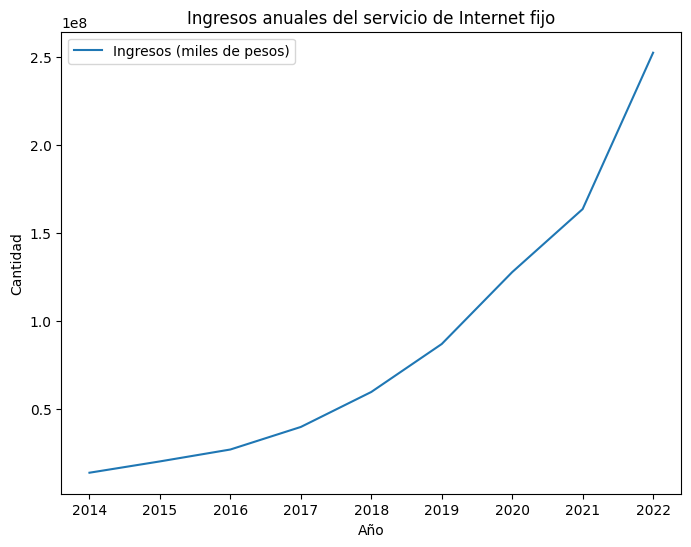

In [116]:
df12.groupby('Año').sum()[['Ingresos (miles de pesos)']].plot(kind='line', figsize=(8, 6))
plt.title('Ingresos anuales del servicio de Internet fijo')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

Al analizar los datos disponibles, se observa claramente que a medida que pasan los años, los ingresos a Internet aumentan. Este fenómeno puede atribuirse a varios factores. En primer lugar, la digitalización de numerosos aspectos de nuestra vida cotidiana ha hecho que el acceso a Internet sea casi indispensable. Ya sea para trabajar, estudiar, comprar o entretenerse, cada vez más actividades requieren una conexión a Internet.

En segundo lugar, el avance tecnológico ha hecho que el acceso a Internet sea más asequible y disponible para un público más amplio. Con el desarrollo de tecnologías de conexión más eficientes y económicas, más personas pueden permitirse tener acceso a Internet en sus hogares.

Además, el crecimiento de la economía digital ha impulsado el aumento de los ingresos a Internet. A medida que más empresas adoptan modelos de negocio en línea y más servicios se digitalizan, la demanda de acceso a Internet sigue creciendo.

# <span style="font-weight:bold">Penetración por hogares nacional de Internet fijo</span>

In [117]:
df13.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.210000,24.150000,Oct-Dic 2022
1,2022,3,76.640000,23.950000,Jul-Sept 2022
2,2022,2,75.965424,23.720442,Abr-Jun 2022
3,2022,1,73.878803,23.049171,Ene-Mar 2022
4,2021,4,73.176397,22.810702,Oct-Dic 2021


Observamos la información de las columnas

In [118]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


Comprobamos si hay nulos

In [119]:
df13.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

Análisis descriptivo de las columnas numéricas

In [120]:
df13.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,60.745449,18.760923
std,2.618615,1.133893,8.512409,2.781875
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.750000,53.164373,16.309188
50%,2018.000000,2.500000,59.926034,18.485000
75%,2020.000000,3.250000,66.638085,20.695048
max,2022.000000,4.000000,77.210000,24.150000


Gráfico penetración hogares nacional de internet fijo por año

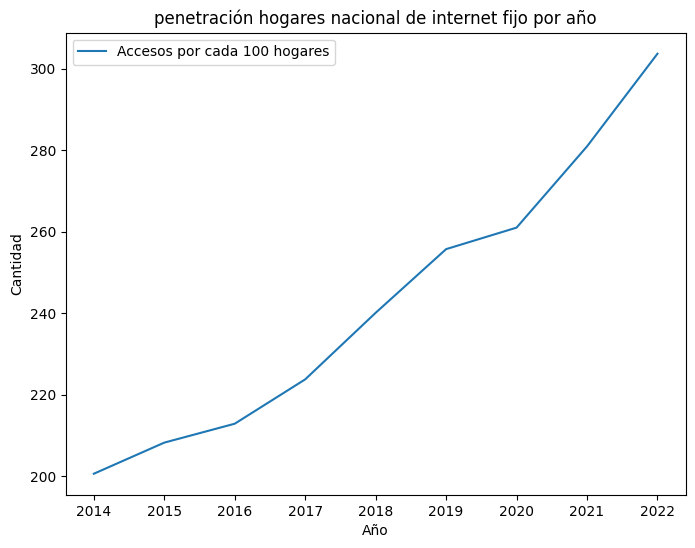

In [121]:
df13.groupby('Año').sum()[['Accesos por cada 100 hogares']].plot(kind='line', figsize=(8, 6))
plt.title('penetración hogares nacional de internet fijo por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

Al observar las tendencias a lo largo de los años, es evidente que el uso de Internet ha penetrado cada vez más en los hogares. Este aumento en la adopción de Internet puede atribuirse a varios factores. En primer lugar, la creciente digitalización de muchas facetas de la vida cotidiana ha hecho que el acceso a Internet sea esencial en la mayoría de los hogares. Ya sea para el trabajo remoto, la educación en línea, las compras en línea o el entretenimiento, Internet se ha convertido en una herramienta indispensable. En segundo lugar, los avances tecnológicos y la mayor asequibilidad han hecho que el acceso a Internet sea más accesible para un público más amplio. Además, las iniciativas gubernamentales y de las organizaciones para reducir la brecha digital también han contribuido a aumentar la penetración de Internet en los hogares. En resumen, la creciente penetración del uso de Internet en los hogares a lo largo de los años es un reflejo de cómo nuestra sociedad se está volviendo cada vez más digital y conectada."

# <span style="font-weight:bold">Velocidad Media de bajada de Internet fijo</span>

In [122]:
df14.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,106.56,Oct-Dic 2022
1,2022,3,62.46,Jul-Sept 2022
2,2022,2,58.44,Abr-Jun 2022
3,2022,1,55.11,Ene-Mar 2022
4,2021,4,52.34,Oct-Dic 2021


Observamos la información de las columnas

In [123]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


Verificamos los nulos

In [124]:
df14.isnull().sum()

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

Comprobamos si hay duplicados

In [125]:
duplicados = df14.duplicated()  
num_duplicados = duplicados.sum()
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


Análisis descriptivo de las columnas numéricas

In [126]:
df14.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,24.180555
std,2.618615,1.133893,23.636842
min,2014.000000,1.000000,3.617127
25%,2016.000000,1.750000,5.338574
50%,2018.000000,2.500000,14.604770
75%,2020.000000,3.250000,41.092500
max,2022.000000,4.000000,106.560000


Gráfico Velocidad media de bajada de Internet fijo por año

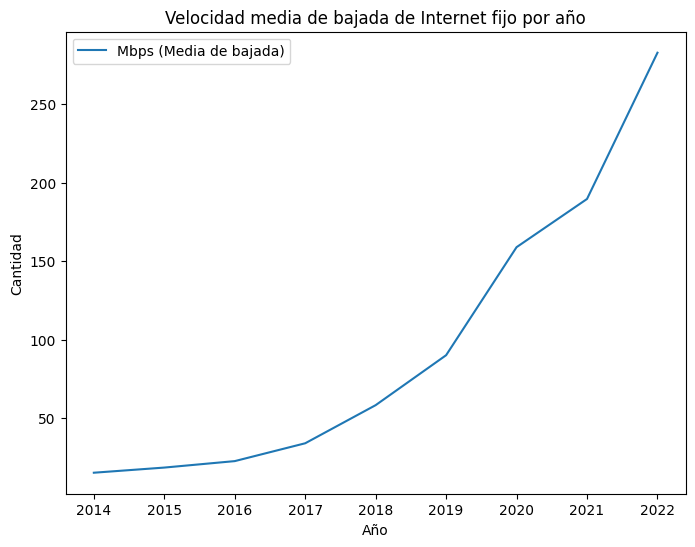

In [127]:
df14.groupby('Año').sum()[['Mbps (Media de bajada)']].plot(kind='line', figsize=(8,6))
plt.title('Velocidad media de bajada de Internet fijo por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

Al analizar los datos, observamos que la media anual de las velocidades de Internet ha experimentado un gran aumento. Este incremento puede atribuirse a varios factores. En primer lugar, los avances tecnológicos han permitido el desarrollo de infraestructuras de Internet más rápidas y eficientes. En segundo lugar, la creciente demanda de servicios en línea, como el streaming de video y los videojuegos, ha impulsado la necesidad de conexiones a Internet más rápidas. Además, las empresas de telecomunicaciones han estado invirtiendo en la mejora de sus redes para poder ofrecer velocidades de Internet más altas. 